In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

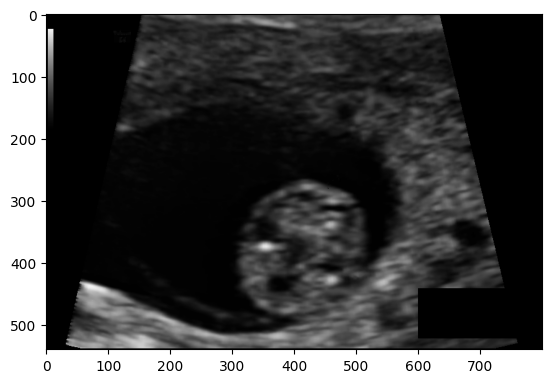

In [3]:
img_path = "../../prac2/training_set/000_HC.png"
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [1]:

import torch
print(torch.cuda.device_count())

0


In [3]:
training_set_pixel = pd.read_csv('training_set_pixel_size_and_HC.csv')

In [5]:
training_set_pixel

,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81
...,...,...,...
994,801_HC.png,0.296851,329.26
995,802_HC.png,0.212267,330.90
996,803_HC.png,0.202743,331.70
997,804_HC.png,0.281090,316.48


In [6]:
def masking(img_):
    im_gr = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(im_gr, 127, 255, 0)
    contours, hierarchy_ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ellipse = cv2.fitEllipse(contours[0])
    return cv2.ellipse(img_, ellipse, (255,255,255), -1)

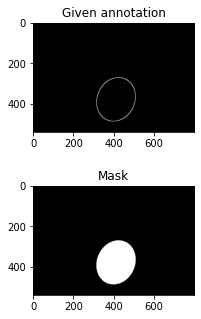

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5))

# Plot data on the first subplot
ax1.imshow(img)
ax1.set_title('Given annotation')

# Plot data on the second subplot
ax2.imshow(masking(img))
ax2.set_title('Mask')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [13]:
os.path.join('..\\..\\prac2\\training_mask', training_set_pixel.iloc[0, 0].replace('.png','_Annotation.png'))

'..\\..\\prac2\\training_mask\\000_HC_Annotation.png'

In [20]:

for index in range(len(training_set_pixel)):
    input_file_path = os.path.join('..\\..\\prac2\\training_set', training_set_pixel.iloc[index, 0].replace('.png','_Annotation.png'))
    image = cv2.imread(input_file_path)
    mask = masking(image)
    output_file_path = input_file_path.replace("training_set", "training_mask")
    cv2.imwrite(output_file_path, mask)